In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


%matplotlib inline


In [3]:
df = pd.read_csv('~/Datasets/iris.csv')

In [4]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.shape

(150, 5)

In [8]:
%pwd

u'/Users/christophereppig/DSI_week3'

In [9]:
df.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


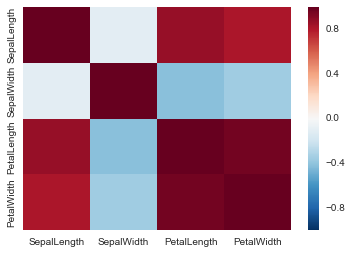

In [13]:
sns.heatmap(df.corr())

In [14]:
x = df.ix[:,0:4].values

In [16]:
x[0:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [20]:
x_standard = StandardScaler().fit_transform(x)

In [21]:
x_standard[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [22]:
## makes a covariance matrix

cov_mat = np.cov(x_standard.T)

In [24]:
## Transposes the data

x_standard.T

array([[ -9.00681170e-01,  -1.14301691e+00,  -1.38535265e+00,
         -1.50652052e+00,  -1.02184904e+00,  -5.37177559e-01,
         -1.50652052e+00,  -1.02184904e+00,  -1.74885626e+00,
         -1.14301691e+00,  -5.37177559e-01,  -1.26418478e+00,
         -1.26418478e+00,  -1.87002413e+00,  -5.25060772e-02,
         -1.73673948e-01,  -5.37177559e-01,  -9.00681170e-01,
         -1.73673948e-01,  -9.00681170e-01,  -5.37177559e-01,
         -9.00681170e-01,  -1.50652052e+00,  -9.00681170e-01,
         -1.26418478e+00,  -1.02184904e+00,  -1.02184904e+00,
         -7.79513300e-01,  -7.79513300e-01,  -1.38535265e+00,
         -1.26418478e+00,  -5.37177559e-01,  -7.79513300e-01,
         -4.16009689e-01,  -1.14301691e+00,  -1.02184904e+00,
         -4.16009689e-01,  -1.14301691e+00,  -1.74885626e+00,
         -9.00681170e-01,  -1.02184904e+00,  -1.62768839e+00,
         -1.74885626e+00,  -1.02184904e+00,  -9.00681170e-01,
         -1.26418478e+00,  -9.00681170e-01,  -1.50652052e+00,
        

In [27]:
## this is also transposed. Covariance matrix is basically the same thing as a correlation matrix.
cov_mat

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [38]:
## make eigenvalues, eigenvectors

eigenValues, eigenVectors = np.linalg.eig(cov_mat)

In [40]:
eigenVectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [39]:
eigenValues

array([ 2.93035378,  0.92740362,  0.14834223,  0.02074601])

In [42]:
## the full transformation across the dataset

eigenValSum = sum(eigenValues)
eigenValSum

4.0268456375838957

In [47]:
## every eigenvalue divided by the amount of change
varianceExplained = [(i/eigenValSum)*100 for i in sorted(eigenValues, reverse=True)]

In [55]:
## the variance exlpained by each principal component (graphed, this would be a scree plot)

varianceExplained

[72.770452093801367,
 23.030523267680621,
 3.6838319576273868,
 0.51519268089063286]

In [49]:
cumulativeVarianceexplained = np.cumsum(varianceExplained)

In [51]:
## this shows the amount of cumulative variance by adding each new principal component
cumulativeVarianceexplained

array([  72.77045209,   95.80097536,   99.48480732,  100.        ])

In [57]:
eigenPairs = zip(eigenValues, eigenVectors)
eigenPairs

[(2.9303537755893192,
  array([ 0.52237162, -0.37231836, -0.72101681,  0.26199559])),
 (0.92740362151734124,
  array([-0.26335492, -0.92555649,  0.24203288, -0.12413481])),
 (0.14834222648163986,
  array([ 0.58125401, -0.02109478,  0.14089226, -0.80115427])),
 (0.020746013995595971,
  array([ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]))]

In [58]:
Pmatrix = np.hstack((eigenPairs[0][1].reshape(4,1), eigenPairs[1][1].reshape(4,1)))

In [59]:
Pmatrix

array([[ 0.52237162, -0.26335492],
       [-0.37231836, -0.92555649],
       [-0.72101681,  0.24203288],
       [ 0.26199559, -0.12413481]])

In [63]:
## applies the Pmatrix (via dot multiplication) to x_standard to create the first two principal components

x_standard.dot(Pmatrix)

array([[-0.2316583 , -0.87967436],
       [ 0.07253025,  0.25502854],
       [-0.18536908, -0.12326756],
       [-0.24451042,  0.15034585],
       [-0.38110853, -1.06194072],
       [-0.44050933, -1.82346152],
       [-0.42753067, -0.52226744],
       [-0.24979851, -0.61982431],
       [-0.15778746,  0.62875583],
       [-0.08907179,  0.07093576],
       [-0.2550866 , -1.38999448],
       [-0.41738895, -0.54224064],
       [-0.02520974,  0.30325906],
       [-0.21867964,  0.42151973],
       [-0.13737131, -2.20145476],
       [-0.59940097, -3.01760131],
       [-0.27650482, -1.878515  ],
       [-0.19721296, -0.89599473],
       [-0.19891512, -1.6886951 ],
       [-0.49668081, -1.52476091],
       [-0.07862214, -0.71993819],
       [-0.3760799 , -1.32690476],
       [-0.47028264, -0.98935358],
       [-0.07901452, -0.45899233],
       [-0.54039234, -0.50095053],
       [ 0.05382265,  0.25064512],
       [-0.22190896, -0.63870169],
       [-0.20936477, -0.89782114],
       [-0.08220807,

In [69]:
from sklearn.decomposition import PCA

In [73]:
## instantiates a PCA object, tells it to extract 2 components
pca = PCA(n_components=2)

In [75]:
pca.fit_transform(x_standard)[0]

array([-2.26454173, -0.5057039 ])

In [78]:
PCA?